In [1]:
# To do:
# Need to make graphs nicer!

/Users/jiaminlim93/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jiaminlim93/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
loans = pd.read_csv('/Users/jiaminlim93/Desktop/GA Data Science Course/project/all_loans.csv', index_col='id')

### Cleaning data

In [2]:
# Cleaning dataset - so there are no nas
df = loans.drop(['basket_amount','paid_amount','paid_date','planned_expiration_date','partner','loan_use'], axis=1)
df = df[df.posted_date.notnull()] # dropping any rows with posted date equals to na
df = df[df.name.notnull()]
df = df[df.loan_term_in_months.notnull()]
df.count()

name                      1108769
country                   1108769
status                    1108765
loan_amount               1108769
funded_amount             1108769
posted_date               1108769
funded_date               1061757
activity                  1108769
sector                    1108769
male_borrowers_count      1108769
female_borrowers_count    1108769
total_borrowers_count     1108769
loan_term_in_months       1108769
dtype: int64

In [3]:
# 1 - Funded vs. expired variable
# Eliminate refunded and fundraising
df = df[df['status'].isin(['funded','expired'])]
df['status_bin']=np.where(df['status']=="expired",1,0)

In [4]:
# 2 - Binary variables for continent and sector
# Continent
countrydf = pd.read_csv('/Users/jiaminlim93/Desktop/GA Data Science Course/project/project/countrydataset.csv')
countrycontdf = pd.concat([countrydf['country'],countrydf['C']], axis=1)
countrycontdf
df = pd.merge(df, countrycontdf, on='country', how='left')

contdummies = pd.get_dummies(df['C'])
contdummies.head()

# Sector
sectordummies = pd.get_dummies(df['sector'])
sectordummies.head()
df = pd.concat([df,contdummies,sectordummies], axis=1)
#df.count()

In [5]:
# 3 - Posted date to year
from datetime import date
df['posted_date'] = pd.to_datetime(df['posted_date'], format='%d-%m-%Y %H:%M:%S')
df['posted_year'] = pd.DatetimeIndex(df['posted_date']).year

In [58]:
# Define x and y variables   
y=df['status_bin']
X=df.drop(['status_bin','name','country','status','funded_amount','posted_date','funded_date','activity','sector','C'], axis=1)

y.to_csv('y.csv',header=False)
X.to_csv('X.csv')

In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status_bin, dtype: int64

### Exploring data

In [26]:
# Some descriptive stats and plots
# df.groupby(['sector']).status_bin.mean().sort_values()
# df.groupby(['country']).status_bin.mean().sort_values().plot()
df.groupby(['posted_year', 'C']).status_bin.mean()
#df.groupby(['C']).status_bin.mean().plot()
#df.count()
#Find out which ones have continent = NA
# drop funded date, C amd Sector

posted_year  C 
2005         AF    0.000000
2006         AF    0.000000
             AS    0.000000
             EU    0.000000
             NO    0.000000
             OC    0.000000
             SA    0.000000
2007         AF    0.000000
             AS    0.000000
             EU    0.000000
             NO    0.000000
             OC    0.000000
             SA    0.000000
2008         AF    0.000000
             AS    0.000000
             EU    0.000000
             NO    0.000000
             OC    0.000000
             SA    0.000000
2009         AF    0.000000
             AS    0.000308
             EU    0.008207
             NO    0.000565
             OC    0.000000
             SA    0.003442
2010         AF    0.000000
             AS    0.000963
             EU    0.010961
             NO    0.002723
             OC    0.000000
                     ...   
2012         AF    0.027192
             AS    0.053201
             EU    0.090960
             NO    0.075366
    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d2f8610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12dd90d50>], dtype=object)

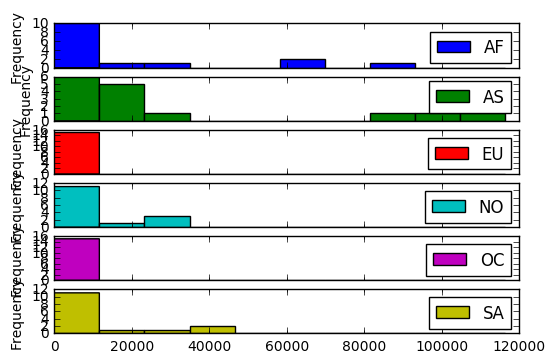

In [51]:
# Plotting graphs
# By country, over time
# pd.pivot_table(df.reset_index(),index='posted_year', columns='C', values='status_bin').plot()
# By sector, over time
# pd.pivot_table(df.reset_index(),index='posted_year', columns='sector', values='status_bin').plot()
# By sector, over time
# pd.pivot_table(df.reset_index(),index='sector', columns='C', values='status_bin').plot(kind='bar',subplots=True)
# By sector, loan count
pd.pivot_table(df.reset_index(),index='sector', columns='C', values='name',aggfunc='count').plot(kind='hist',subplots=True)


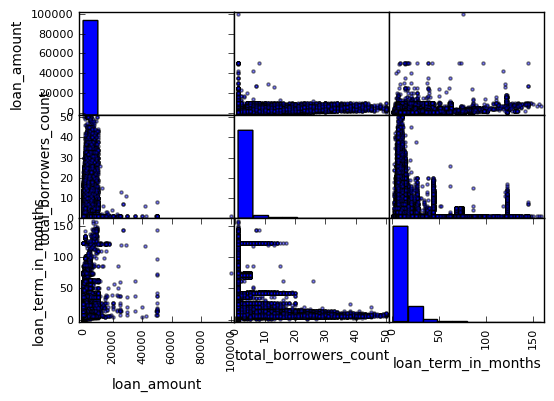

In [54]:
# Continuous variables
contvar = pd.concat([df['loan_amount'], df['total_borrowers_count'],df['loan_term_in_months']], axis=1)
contvar1= contvar[contvar['loan_amount'] < 600000]
#contvar_log = np.log(contvar)
#scatter = pd.tools.plotting.scatter_matrix(contvar1)
#contvar_log